In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# Introduction

This project aims to analyze a medical data set gathered at the Security Forces Hospital during 2019. This medical data has been gathered to investigate how the Body Mass Index (BMI) is interpeted and understood among patients. First, a breif assessing of the data set will be conducted. The point from assessing the data is to detect issues and clean them later. The last part is the analysis part where several questions are proposed and answered. Finally, a summary conclusion about all the previous stages is made.

In [2]:
df = pd.read_csv('BMI_Stage1.csv')
df.head()

,hight,weight,age,q12,q13,q14,gender,education,job_status,social_status,monthly_income,diabetes,HTN,cholesterol,heart,siblings_obesity,know_BMI,connection,doctor_discussion,BMI
0,175,80.0,29,NaN,NaN,NaN,male,highschool,employee,single,rich,0,0,0,1,0,0,NaN,0,26.122449
1,170,69.0,28,NaN,NaN,NaN,male,highschool,employee,single,rich,0,0,0,1,0,0,NaN,0,23.875433
2,172,78.0,32,3.0,4.0,5.0,male,Bachelor,employee,married,rich,0,0,0,1,0,1,all,0,26.365603
3,173,86.0,28,NaN,NaN,NaN,male,Bachelor,employee,single,high,0,0,0,1,0,0,NaN,0,28.734672
4,186,101.0,32,NaN,NaN,NaN,male,Bachelor,employee,single,low,0,0,0,1,0,0,NaN,0,29.194126


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 17 columns):
hight     426 non-null int64
weight    426 non-null float64
age       426 non-null int64
q1        426 non-null int64
q2        426 non-null int64
q3        426 non-null int64
q4        426 non-null int64
q5        377 non-null float64
q6        426 non-null object
q7        426 non-null int64
q8        426 non-null int64
q9        410 non-null float64
q10       112 non-null float64
q11       120 non-null float64
q12       128 non-null float64
q13       128 non-null float64
q14       128 non-null float64
dtypes: float64(8), int64(8), object(1)
memory usage: 56.7+ KB


# Cleaning

> Change those unknown columns into something readable, and start with Q1 (gender)

# Q1 Gender

In [4]:
# if 1 make it male, if 2 make it female

df['gender']='a'
for i in range(df.shape[0]):
        if (df.q1[i] == 1):
            df['gender'][i]='male'
        elif (df.q1[i] == 2):
            df['gender'][i]='female'
        


In [5]:
df.head(100)

,hight,weight,age,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,gender
0,175,80.0,29,1,3,2,1,1.0,5,2,2,NaN,NaN,NaN,NaN,NaN,NaN,male
1,170,69.0,28,1,3,2,1,1.0,5,2,2,2.0,NaN,NaN,NaN,NaN,NaN,male
2,172,78.0,32,1,4,2,2,1.0,5,2,1,1.0,5.0,2.0,3.0,4.0,5.0,male
3,173,86.0,28,1,4,2,1,2.0,5,2,2,2.0,NaN,NaN,NaN,NaN,NaN,male
4,186,101.0,32,1,4,2,1,3.0,5,2,2,2.0,NaN,NaN,NaN,NaN,NaN,male
5,164,64.0,25,1,3,2,1,4.0,5,2,2,2.0,NaN,NaN,NaN,NaN,NaN,male
6,147,47.0,48,2,1,3,2,4.0,2,2,1,2.0,4.0,2.0,5.0,4.0,6.0,female
7,119,156.0,22,2,2,3,2,3.0,5,2,1,2.0,NaN,NaN,3.0,4.0,5.0,female
8,91,161.0,34,2,3,3,2,4.0,3,1,2,2.0,NaN,NaN,NaN,NaN,NaN,female
9,160,86.0,29,2,3,3,2,3.0,5,1,1,NaN,3.0,2.0,6.0,1.0,5.0,female


In [5]:
# test
print(df['q1'].value_counts())
print(df['gender'].value_counts())

1    314
2    112
Name: q1, dtype: int64
male      314
female    112
Name: gender, dtype: int64


# Q2 Education Level

In [7]:
df['q2'].value_counts()

3    176
4    121
1     73
2     56
Name: q2, dtype: int64

In [6]:
# if 1 elementary, if 2 middle, if 3 highschool, if 4 diploma or bachelor, if 5 master or PHD

df['education']='a'
for i in range(df.shape[0]):
    if (df['q2'][i]==1):
        df['education'][i]='elementary'
    if (df['q2'][i]==2):
        df['education'][i]='middle'
    if (df['q2'][i]==3):
        df['education'][i]='highschool'
    if (df['q2'][i]==4):
        df['education'][i]='Bachelor'
    if (df['q2'][i]==5):
        df['education'][i]='PHD'

In [7]:
df['education'].value_counts()

highschool    176
Bachelor      121
elementary     73
middle         56
Name: education, dtype: int64

# Now Q3 Job Status

In [8]:
# if 1 make it student, if 2 make it employee, if 3 make it unemployee, if 4 make it retired

df['job_status']='a'
for i in range(df.shape[0]):
    if (df['q3'][i]==1):
        df['job_status'][i]='student'
    elif (df['q3'][i]==2):
        df['job_status'][i]='employee'
    elif (df['q3'][i]==3):
        df['job_status'][i]='unemployee'
    elif (df['q3'][i]==4):
        df['job_status'][i]='retired'
    
        
df.head()

,hight,weight,age,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,gender,education,job_status
0,175,80.0,29,1,3,2,1,1.0,5,2,2,NaN,NaN,NaN,NaN,NaN,NaN,male,highschool,employee
1,170,69.0,28,1,3,2,1,1.0,5,2,2,2.0,NaN,NaN,NaN,NaN,NaN,male,highschool,employee
2,172,78.0,32,1,4,2,2,1.0,5,2,1,1.0,5.0,2.0,3.0,4.0,5.0,male,Bachelor,employee
3,173,86.0,28,1,4,2,1,2.0,5,2,2,2.0,NaN,NaN,NaN,NaN,NaN,male,Bachelor,employee
4,186,101.0,32,1,4,2,1,3.0,5,2,2,2.0,NaN,NaN,NaN,NaN,NaN,male,Bachelor,employee


In [9]:
# test

print(df['q3'].value_counts())
print(df['job_status'].value_counts())

2    168
4    130
3    112
1     16
Name: q3, dtype: int64
employee      168
retired       130
unemployee    112
student        16
Name: job_status, dtype: int64


# Q4 Social Status

In [10]:
# if 1 then single, if 2 then married, if 3 then devorsed, if 4 then widow

df['social_status'] = 'a'

for i in range(df.shape[0]):
    if (df['q4'][i]==1):
        df['social_status'][i]='single'
    elif (df['q4'][i]==2):
        df['social_status'][i]='married'
    elif (df['q4'][i]==3):
        df['social_status'][i]='devorsed'
    elif (df['q4'][i]==4):
        df['social_status'][i]='widow'

In [11]:
# test

print(df['q4'].value_counts())
print(df['social_status'].value_counts())

2    338
1     72
4      8
3      8
Name: q4, dtype: int64
married     338
single       72
devorsed      8
widow         8
Name: social_status, dtype: int64


# Q5 Monthly Income

In [12]:
# if 1 rich, if 2 high, if 3 low, if 4 poor

df['monthly_income']='no_idea'

for i in range(df.shape[0]):
    if (df['q5'][i]==1):
        df['monthly_income'][i]='rich'
    elif(df['q5'][i]==2):
        df['monthly_income'][i]='high'
    elif (df['q5'][i]==3):
        df['monthly_income'][i]='low'
    elif (df['q5'][i]==4):
        df['monthly_income'][i]='poor'

In [13]:
# test

print(df['q5'].value_counts())
print(df['monthly_income'].value_counts())

3.0    137
4.0     88
2.0     80
1.0     72
Name: q5, dtype: int64
low        137
poor        88
high        80
rich        72
no_idea     49
Name: monthly_income, dtype: int64


# Q6 chronic diseases

In [17]:
df['q6'].value_counts()

5      241
1      113
2       48
3       16
1,2      8
Name: q6, dtype: int64

In [14]:
# if 1 diabetes, if 2 HTN, if 3 cholesterol, if 5 heart

df['diabetes']=0
df['HTN']=0
df['cholesterol']=0
df['heart']=0

for i in range(df.shape[0]):
    if (df['q6'][i]=='1'):
        df['diabetes'][i]=1
    elif (df['q6'][i]=='2'):
        df['HTN'][i]=1
    elif (df['q6'][i]=='3'):
        df['cholesterol'][i]=1
    elif (df['q6'][i]=='1,2'):
        df['diabetes'][i]=1
        df['HTN'][i]=1
    elif (df['q6'][i]=='5'):
        df['heart'][i]=1
            

In [15]:
# test 

print('diabetes',df['diabetes'].sum())
print('HTN',df['HTN'].sum())
print('cholesterol',df['cholesterol'].sum())
print('heart',df['heart'].sum())

diabetes 121
HTN 56
cholesterol 16
heart 241


# Q7 Siblings Obesity

In [20]:
df['q7'].value_counts()

2    297
1    129
Name: q7, dtype: int64

In [16]:
# if 1 make it 1, if 2 make it 0

df['siblings_obesity']=0
for i in range(df.shape[0]):
    if(df['q7'][i]==1):
        df['siblings_obesity'][i]=1

In [17]:
df['siblings_obesity'].value_counts()

0    297
1    129
Name: siblings_obesity, dtype: int64

# Jump to Q9 Know BMI

In [24]:
df['q9'].value_counts()

2.0    338
1.0     72
Name: q9, dtype: int64

In [18]:
# if 1 make it 1

df['know_BMI']=0
for i in range(df.shape[0]):
    if(df['q9'][i]==1.0):
        df['know_BMI'][i]=1

In [19]:
# test

df['know_BMI'].value_counts()

0    354
1     72
Name: know_BMI, dtype: int64

# Continue Cleaning Q10

In [28]:
df['q10'].value_counts()

5.0    48
1.0    24
3.0    16
4.0    16
2.0     8
Name: q10, dtype: int64

In [20]:
# 1 diabetes, 2 HTN, 3 heart problems, 4 cholesterol, 5 All

df['connection']=''

for i in range(df.shape[0]):
    
    if (df['q10'][i]==1):
        df['connection'][i]='diabetes'
    elif (df['q10'][i]==2):
        df['connection'][i]='HTN'
    elif (df['q10'][i]==3):
        df['connection'][i]='heart_problems'
    elif (df['q10'][i]==4):
        df['connection'][i]='cholesterol'
    elif (df['q10'][i]==5):
        df['connection'][i]='all'

In [21]:
df['connection'].value_counts()

                  314
all                48
diabetes           24
heart_problems     16
cholesterol        16
HTN                 8
Name: connection, dtype: int64

# Q11 Doctor Discussion

In [36]:
df['q11'].value_counts()

2.0    96
1.0    24
Name: q11, dtype: int64

In [22]:
# 1 equal 1

df['doctor_discussion'] = 0

for i in range(df.shape[0]):
    if (df['q11'][i]==1):
        df['doctor_discussion'][i] = 1
        

In [23]:
df['doctor_discussion'].value_counts()

0    402
1     24
Name: doctor_discussion, dtype: int64

# Keep Q 12, 13, 14 and drop other questions

In [24]:
df.drop(['q1','q2','q3','q4','q5','q6','q7','q8','q9','q10','q11'], axis=1, inplace=True) #droping those columns

In [25]:
df.head(100) # look if they are dropped

,hight,weight,age,q12,q13,q14,gender,education,job_status,social_status,monthly_income,diabetes,HTN,cholesterol,heart,siblings_obesity,know_BMI,connection,doctor_discussion
0,175,80.0,29,NaN,NaN,NaN,male,highschool,employee,single,rich,0,0,0,1,0,0,,0
1,170,69.0,28,NaN,NaN,NaN,male,highschool,employee,single,rich,0,0,0,1,0,0,,0
2,172,78.0,32,3.0,4.0,5.0,male,Bachelor,employee,married,rich,0,0,0,1,0,1,all,0
3,173,86.0,28,NaN,NaN,NaN,male,Bachelor,employee,single,high,0,0,0,1,0,0,,0
4,186,101.0,32,NaN,NaN,NaN,male,Bachelor,employee,single,low,0,0,0,1,0,0,,0
5,164,64.0,25,NaN,NaN,NaN,male,highschool,employee,single,poor,0,0,0,1,0,0,,0
6,147,47.0,48,5.0,4.0,6.0,female,elementary,unemployee,married,poor,0,1,0,0,0,0,cholesterol,0
7,119,156.0,22,3.0,4.0,5.0,female,middle,unemployee,married,low,0,0,0,1,0,0,,0
8,91,161.0,34,NaN,NaN,NaN,female,highschool,unemployee,married,poor,0,0,1,0,1,0,,0
9,160,86.0,29,6.0,1.0,5.0,female,highschool,unemployee,married,low,0,0,0,1,1,0,heart_problems,0


# Creat BMI Column

In [29]:
h = df['hight']/100 # BMI = weight/height^2
hight_square=h*h
df['BMI']= df['weight']/hight_square

# Save the data

In [91]:
df.to_csv('BMI_Stage1.csv', index = False)

# Make Sure The BMI is Properly Calculated

In [66]:
df.head(150)

,hight,weight,age,q12,q13,q14,gender,education,job_status,social_status,monthly_income,diabetes,HTN,cholesterol,heart,siblings_obesity,know_BMI,connection,doctor_discussion,BMI
0,175,80.0,29,NaN,NaN,NaN,male,highschool,employee,single,rich,0,0,0,1,0,0,,0,26.122449
1,170,69.0,28,NaN,NaN,NaN,male,highschool,employee,single,rich,0,0,0,1,0,0,,0,23.875433
2,172,78.0,32,3.0,4.0,5.0,male,Bachelor,employee,married,rich,0,0,0,1,0,1,all,0,26.365603
3,173,86.0,28,NaN,NaN,NaN,male,Bachelor,employee,single,high,0,0,0,1,0,0,,0,28.734672
4,186,101.0,32,NaN,NaN,NaN,male,Bachelor,employee,single,low,0,0,0,1,0,0,,0,29.194126
5,164,64.0,25,NaN,NaN,NaN,male,highschool,employee,single,poor,0,0,0,1,0,0,,0,23.795360
6,147,47.0,48,5.0,4.0,6.0,female,elementary,unemployee,married,poor,0,1,0,0,0,0,cholesterol,0,21.750197
7,119,156.0,22,3.0,4.0,5.0,female,middle,unemployee,married,low,0,0,0,1,0,0,,0,110.161712
8,161,91.0,34,NaN,NaN,NaN,female,highschool,unemployee,married,poor,0,0,1,0,1,0,,0,194.420964
9,160,86.0,29,6.0,1.0,5.0,female,highschool,unemployee,married,low,0,0,0,1,1,0,heart_problems,0,33.593750


In [27]:
# changing wieght and hight of index 8

df['weight'][8]=91
df['hight'][8]=161

In [30]:
df[df['BMI']>=45].head()

,hight,weight,age,q12,q13,q14,gender,education,job_status,social_status,monthly_income,diabetes,HTN,cholesterol,heart,siblings_obesity,know_BMI,connection,doctor_discussion,BMI
7,119,156.0,22,3.0,4.0,5.0,female,middle,unemployee,married,low,0,0,0,1,0,0,,0,110.161712
11,126,113.0,33,3.0,4.0,5.0,female,Bachelor,student,single,low,0,0,0,1,0,1,all,0,71.176619
24,112,89.0,51,NaN,NaN,NaN,male,highschool,retired,married,low,0,0,0,1,0,0,,0,70.950255
33,148,115.0,41,6.0,6.0,6.0,male,elementary,retired,married,poor,1,0,0,0,1,1,diabetes,1,52.501826
40,178,149.0,29,3.0,4.0,5.0,male,highschool,employee,married,low,0,0,0,1,0,1,,0,47.026891


> We can notice here that we have 5 people whose BMI are greator than 45.

In [31]:
# interchnage hight and weight for index 7

temp = df['weight'][7]
df['weight'][7] = df['hight'][7]
df['hight'][7]= temp

In [77]:
df.describe()

,hight,weight,age,q12,q13,q14,diabetes,HTN,cholesterol,heart,siblings_obesity,know_BMI,doctor_discussion,BMI
count,426.000000,426.000000,426.000000,128.000000,128.000000,128.00000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,164.086854,89.547887,39.563380,4.000000,3.937500,5.18750,0.284038,0.131455,0.037559,0.565728,0.302817,0.169014,0.056338,36.143331
std,16.841251,25.029526,12.300052,1.587352,1.566128,0.95365,0.451485,0.338295,0.190350,0.496244,0.460017,0.375205,0.230844,25.036528
min,91.000000,47.000000,2.000000,1.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,162.000000,74.000000,29.000000,3.000000,3.750000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.365603
50%,169.000000,86.000000,38.000000,3.500000,4.000000,5.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,29.903029
75%,173.000000,102.000000,48.000000,6.000000,4.500000,6.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,35.918367
max,186.000000,161.000000,65.000000,6.000000,6.000000,6.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,194.420964


> Mean BMI for this data set is 36.14 which is considered obese.

In [41]:
# interchange hight and weight for indecies 61 114 167 220 285

index = {0:61, 1:114, 2:167, 3:220, 4:285} # dictionary for those indecies

for i in range(len(index)):
    temp_val = df['weight'][index[i]]
    df['weight'][index[i]]= df['hight'][index[i]]
    df['hight'][index[i]]= temp_val
    

# now recalculate BMI again

h = df['hight']/100 # BMI = weight/height^2
hight_square=h*h
df['BMI']= df['weight']/hight_square

In [42]:
# test above loop

df[df['BMI']>=100].head()

,hight,weight,age,q12,q13,q14,gender,education,job_status,social_status,monthly_income,diabetes,HTN,cholesterol,heart,siblings_obesity,know_BMI,connection,doctor_discussion,BMI
60,119,156.0,22,3.0,4.0,5.0,female,middle,unemployee,married,low,0,0,0,1,0,0,,0,110.161712
113,119,156.0,22,3.0,4.0,5.0,female,middle,unemployee,married,low,0,0,0,1,0,0,,0,110.161712
166,119,156.0,22,3.0,4.0,5.0,female,middle,unemployee,married,low,0,0,0,1,0,0,,0,110.161712
219,119,156.0,22,3.0,4.0,5.0,female,middle,unemployee,married,low,0,0,0,1,0,0,,0,110.161712
284,119,156.0,22,3.0,4.0,5.0,female,middle,unemployee,married,low,0,0,0,1,0,0,,0,110.161712


In [43]:
# again repeat above loop te solve the issue

# interchange hight and weight for indecies 61 114 167 220 285

index = {0:60, 1:113, 2:166, 3:219, 4:284} # dictionary for those indecies

for i in range(len(index)):
    temp_val = df['weight'][index[i]]
    df['weight'][index[i]]= df['hight'][index[i]]
    df['hight'][index[i]]= temp_val
    

# now recalculate BMI again

h = df['hight']/100 # BMI = weight/height^2
hight_square=h*h
df['BMI']= df['weight']/hight_square

In [45]:
# test the problem

df[df['BMI']>=100].head(100)

,hight,weight,age,q12,q13,q14,gender,education,job_status,social_status,monthly_income,diabetes,HTN,cholesterol,heart,siblings_obesity,know_BMI,connection,doctor_discussion,BMI
337,119,156.0,22,3.0,4.0,5.0,female,middle,unemployee,married,low,0,0,0,1,0,0,,0,110.161712
338,91,161.0,34,NaN,NaN,NaN,female,highschool,unemployee,married,poor,0,0,1,0,1,0,,0,194.420964
390,119,156.0,22,3.0,4.0,5.0,female,middle,unemployee,married,low,0,0,0,1,0,0,,0,110.161712
391,91,161.0,34,NaN,NaN,NaN,female,highschool,unemployee,married,poor,0,0,1,0,1,0,,0,194.420964


In [46]:
# again we repeet the loop

# again repeat above loop te solve the issue

# interchange hight and weight for indecies 61 114 167 220 285

index = {0:337, 1:338, 2:390, 3:391} # dictionary for those indecies

for i in range(len(index)):
    temp_val = df['weight'][index[i]]
    df['weight'][index[i]]= df['hight'][index[i]]
    df['hight'][index[i]]= temp_val
    

# now recalculate BMI again

h = df['hight']/100 # BMI = weight/height^2
hight_square=h*h
df['BMI']= df['weight']/hight_square

In [47]:
# test the problem

df[df['BMI']>=50].head(100)

,hight,weight,age,q12,q13,q14,gender,education,job_status,social_status,monthly_income,diabetes,HTN,cholesterol,heart,siblings_obesity,know_BMI,connection,doctor_discussion,BMI
11,126,113.0,33,3.0,4.0,5.0,female,Bachelor,student,single,low,0,0,0,1,0,1,all,0,71.176619
24,112,89.0,51,NaN,NaN,NaN,male,highschool,retired,married,low,0,0,0,1,0,0,,0,70.950255
33,148,115.0,41,6.0,6.0,6.0,male,elementary,retired,married,poor,1,0,0,0,1,1,diabetes,1,52.501826
64,126,113.0,33,3.0,4.0,5.0,female,Bachelor,student,single,low,0,0,0,1,0,1,all,0,71.176619
77,112,89.0,51,NaN,NaN,NaN,male,highschool,retired,married,low,0,0,0,1,0,0,,0,70.950255
86,148,115.0,41,6.0,6.0,6.0,male,elementary,retired,married,poor,1,0,0,0,1,1,diabetes,1,52.501826
117,126,113.0,33,3.0,4.0,5.0,female,Bachelor,student,single,low,0,0,0,1,0,1,all,0,71.176619
130,112,89.0,51,NaN,NaN,NaN,male,highschool,retired,married,low,0,0,0,1,0,0,,0,70.950255
139,148,115.0,41,6.0,6.0,6.0,male,elementary,retired,married,poor,1,0,0,0,1,1,diabetes,1,52.501826
170,126,113.0,33,3.0,4.0,5.0,female,Bachelor,student,single,low,0,0,0,1,0,1,all,0,71.176619


In [48]:
df.to_csv('BMI_Stage1.csv', index = False)

# Assessing

> Now, after we had reshaped the data and organize it properly, we will start assessing and exploring the variabled to dtect patterns and understand the nature of this data set.

In [49]:
df.info() # data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 20 columns):
hight                426 non-null int64
weight               426 non-null float64
age                  426 non-null int64
q12                  128 non-null float64
q13                  128 non-null float64
q14                  128 non-null float64
gender               426 non-null object
education            426 non-null object
job_status           426 non-null object
social_status        426 non-null object
monthly_income       426 non-null object
diabetes             426 non-null int64
HTN                  426 non-null int64
cholesterol          426 non-null int64
heart                426 non-null int64
siblings_obesity     426 non-null int64
know_BMI             426 non-null int64
connection           426 non-null object
doctor_discussion    426 non-null int64
BMI                  426 non-null float64
dtypes: float64(5), int64(9), object(6)
memory usage: 66.6+ KB


In [50]:
df.describe() # summary statistics

,hight,weight,age,q12,q13,q14,diabetes,HTN,cholesterol,heart,siblings_obesity,know_BMI,doctor_discussion,BMI
count,426.000000,426.000000,426.000000,128.000000,128.000000,128.00000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,165.845070,87.789671,39.563380,4.000000,3.937500,5.18750,0.284038,0.131455,0.037559,0.565728,0.302817,0.169014,0.056338,32.518823
std,12.660989,21.928957,12.300052,1.587352,1.566128,0.95365,0.451485,0.338295,0.190350,0.496244,0.460017,0.375205,0.230844,10.653707
min,112.000000,47.000000,2.000000,1.000000,1.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,162.000000,74.000000,29.000000,3.000000,3.750000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.365603
50%,169.000000,86.000000,38.000000,3.500000,4.000000,5.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,29.903029
75%,173.000000,101.000000,48.000000,6.000000,4.500000,6.00000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,35.222856
max,186.000000,149.000000,65.000000,6.000000,6.000000,6.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.176619


# Univariate Exploration

> Examine the distribution of age.

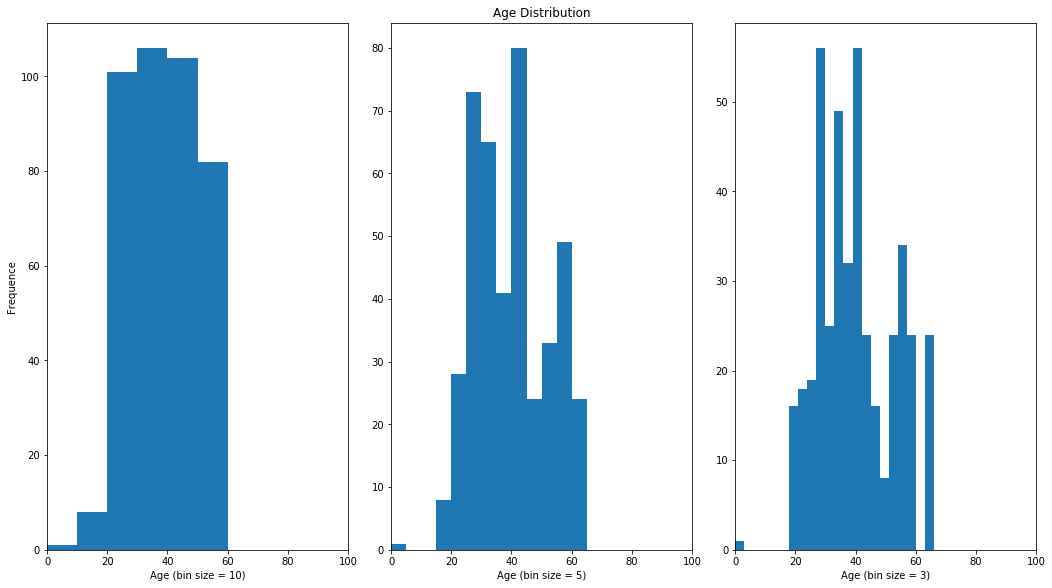

In [58]:
#  creat three histograms with different bin sizes

plt.figure(figsize = [14.7,8.27]);


# first histogram
plt.subplot(1,3,1) 
plt.tight_layout()
bin_size = np.arange(0, df['age'].max()+2, 10)
plt.hist(data=df, x='age', bins= bin_size);
plt.xlim([0,100]);
plt.xlabel('Age (bin size = 10)');
plt.ylabel('Frequence');

# second histogram
plt.subplot(1,3,2)
plt.title('Age Distribution');
plt.tight_layout()
bin_size = np.arange(0, df['age'].max()+2, 5)
plt.hist(data=df, x='age', bins = bin_size);
plt.xlim([0,100]);
plt.xlabel('Age (bin size = 5)');

#third histogram
plt.subplot(1,3,3)
plt.tight_layout()
bin_size = np.arange(0, df['age'].max()+2, 3)
plt.hist(data=df, x='age', bins=bin_size);
plt.xlim([0,100]);
plt.xlabel('Age (bin size = 3)');

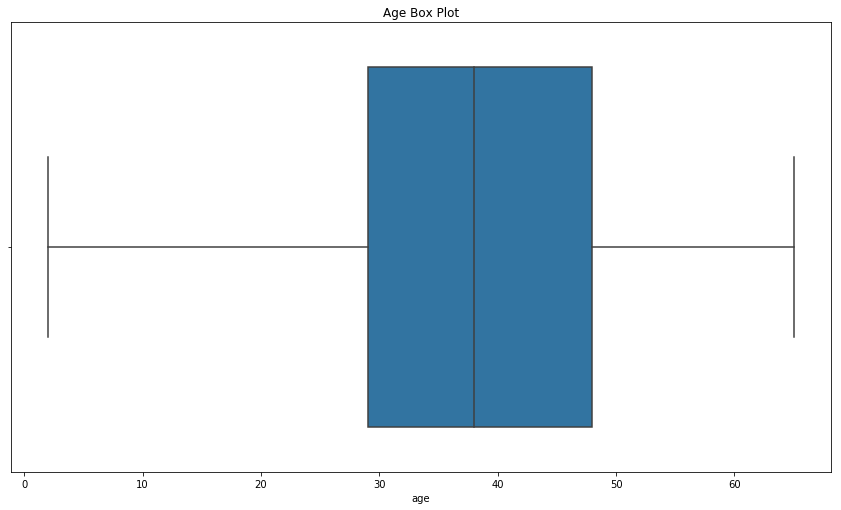

In [61]:
# have a box plot for age

plt.figure(figsize = [14.7, 8.27])
base_color = sb.color_palette()[0]
sb.boxplot(data=df, x='age', color=base_color);
plt.title('Age Box Plot');

> It appers that the age distribution has no fixed shape with concetration in the interval [30,40]. Also, no outlires are seen in the box plot

> Let us look now at the distribution of the main variable of interest 'BMI'

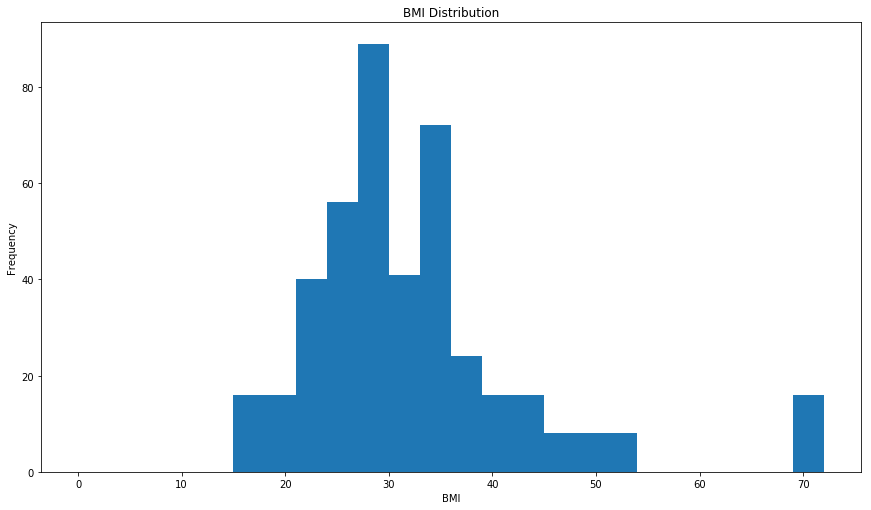

In [68]:
# creat histogram with bin size =3

plt.figure(figsize=[14.7, 8.27])
bin_size = np.arange(0, df['BMI'].max()+2, 3)
plt.hist(data= df, x='BMI', bins = bin_size);
plt.xlabel('BMI');
plt.ylabel('Frequency');
plt.title('BMI Distribution');

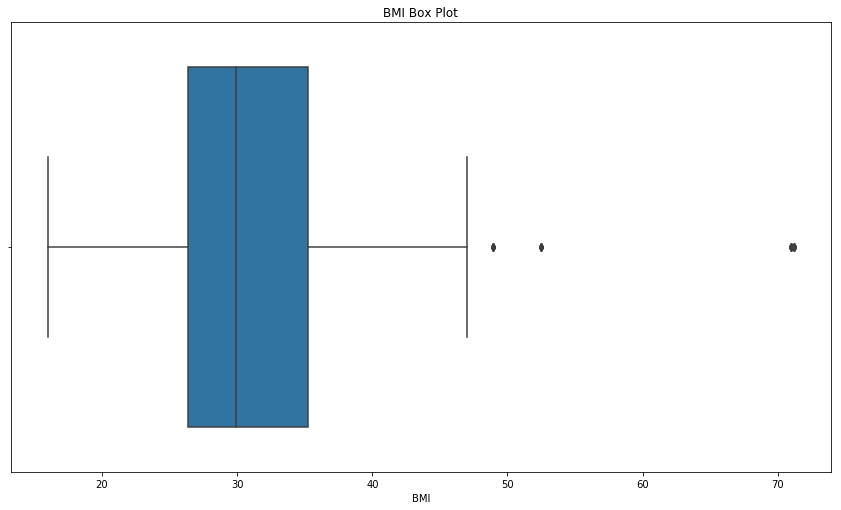

In [70]:
# creat boxplot for BMI

plt.figure(figsize=[14.7,8.27])
color_base = sb.color_palette()[0]
sb.boxplot(data =df, x='BMI', color=base_color);
plt.title('BMI Box Plot');

> It appears that BMI variable is approximately normal with few outliers. The IQR (Inter Quartile Range) is very narrow and the maen BMI is very close to 30 (weighted).

>what is the proportion of each gender?

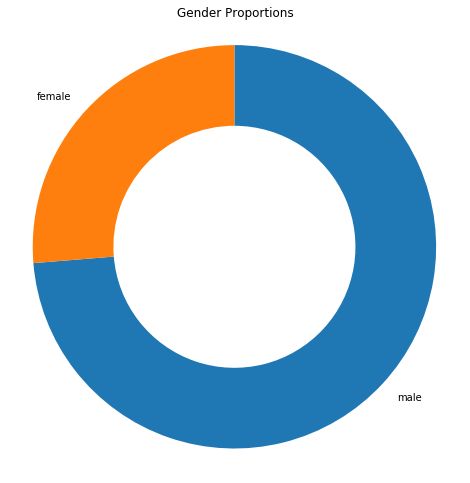

In [81]:
# creat a donut chart

plt.figure(figsize=[14.7,8.27])
sorted_counts = df['gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90, counterclock=False,
           wedgeprops = {'width':0.4});
plt.title('Gender Proportions');
plt.axis('square');

> Clearly, men constitute a proportion of 75%.

> Examin education level

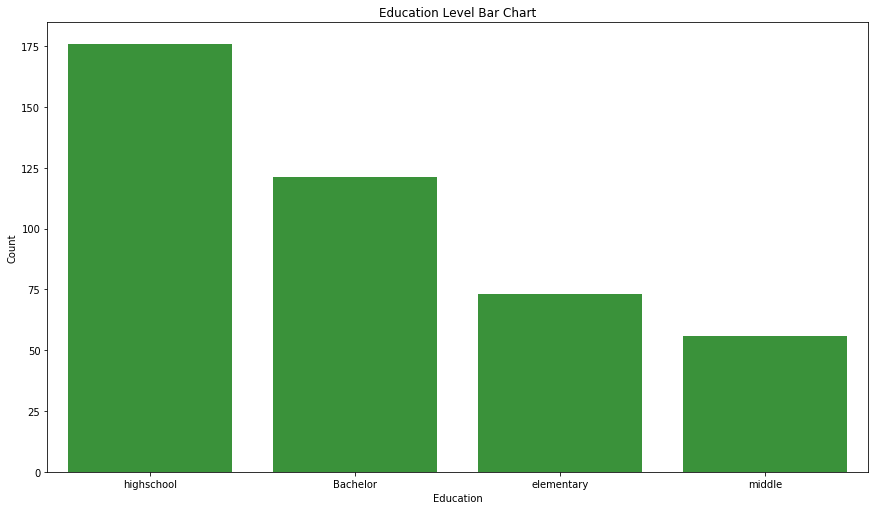

In [77]:
# creat a bar chart for education level

plt.figure(figsize=[14.7,8.27])
base_color = sb.color_palette()[2]
sb.countplot(data=df, x='education', color=base_color);
plt.title('Education Level Bar Chart');
plt.xlabel('Education');
plt.ylabel('Count');

> Majority had education up to highschool with a large number having bachelor.

> Examine job status variable

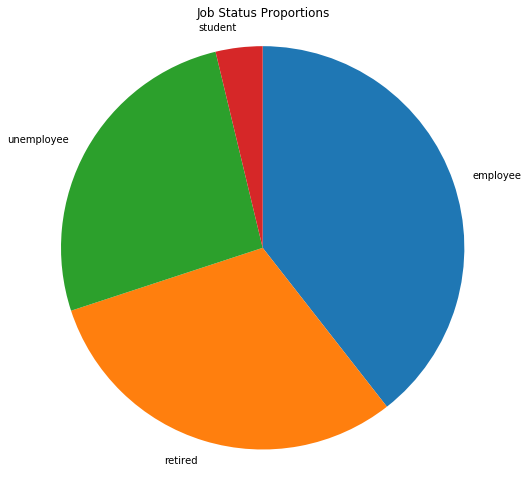

In [80]:
# create a pie chart for job status

plt.figure(figsize=[14.7,8.27])
sorted_counts = df['job_status'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle=90, counterclock = False);
plt.title('Job Status Proportions');
plt.axis('square');

# Multivariate Exploration

> Examine the correlations between all numeric variables

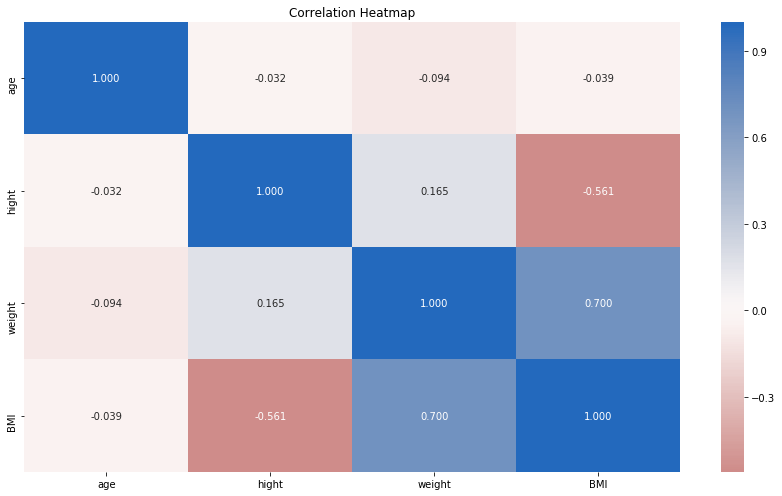

In [88]:
# creat a heatmap that link corr to each other

plt.figure(figsize=[14.7,8.27]);
numeric_vars = ['age','hight','weight','BMI']
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Correlation Heatmap');

> No strong linear relationship appears between independent variables.

> Create a matrix of box plots between numeric and catagorical variables

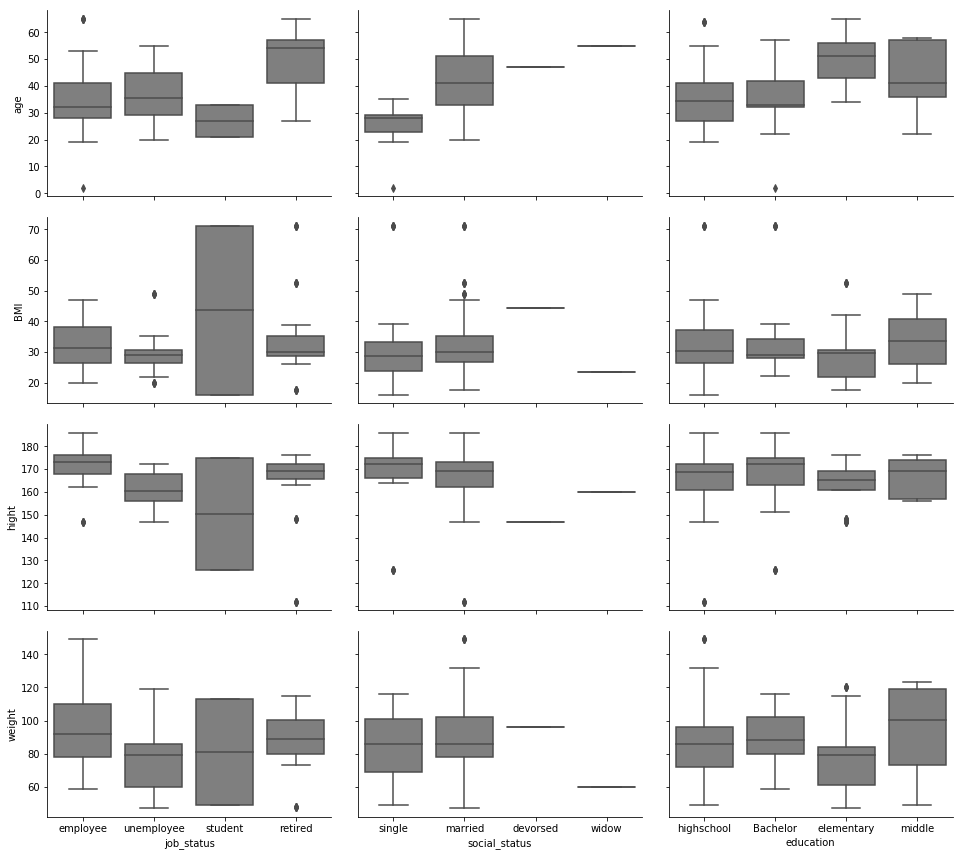

In [9]:
# numeriv variable = age, BMI, hight, weight
#catagorical variables = job status, social status, education

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[7];
    sb.boxplot(x, y, color = default_color);
    


g = sb.PairGrid(data = df, y_vars = ['age', 'BMI','hight','weight'], x_vars = ['job_status','social_status','education'],
                size = 3, aspect = 1.5);
g.map(boxgrid);

> Examin a sccater plot of age & BMI

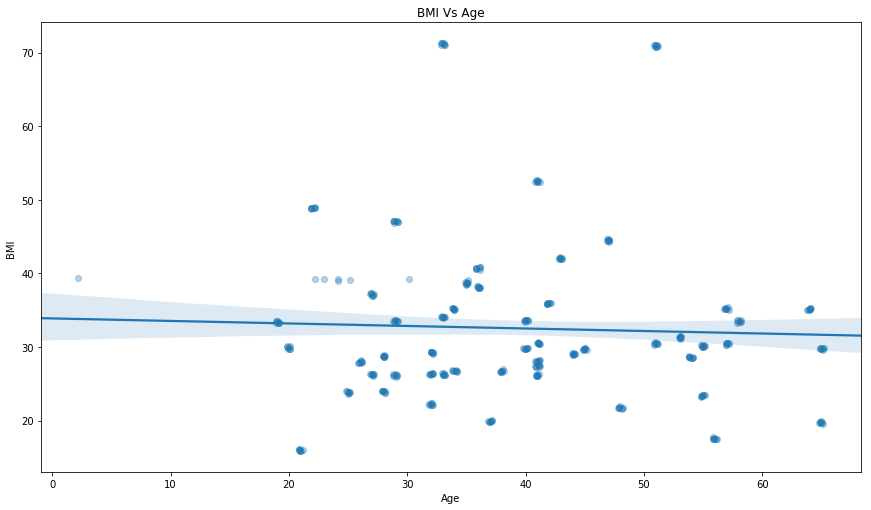

In [90]:
# creat a sccater plot for age & BMI

plt.figure(figsize=[14.7,8.27])
sb.regplot(data = df, x = 'age', y = 'BMI', fit_reg = True,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});
plt.xlabel('Age');
plt.ylabel('BMI ');
plt.title('BMI Vs Age');

> We can note that no relation exists between age and BMI variable.

# ِAnalysis Part

> At this stage we will start analyzing Q12, Q13, and Q14 along with connection variable to answer the following questions:

> 1- Are people who discussed BMI with their doctors have less BMI average?

> 2- Are people who have obese siblings have less BMI average?

> 3- What proportion of people have answered the last three questions correctly?

### Answering Question 1

> 1- Are people who discussed BMI with their doctors have less BMI average?

In [93]:
df[df['doctor_discussion']==1]['BMI'].mean(), df[df['doctor_discussion']==0]['BMI'].mean()

(39.70888794483846, 32.08956495915826)

Surprisingly, people who did not discuss BMI with their doctors have a less average. Let us plot the two distributions to emphasize the results.

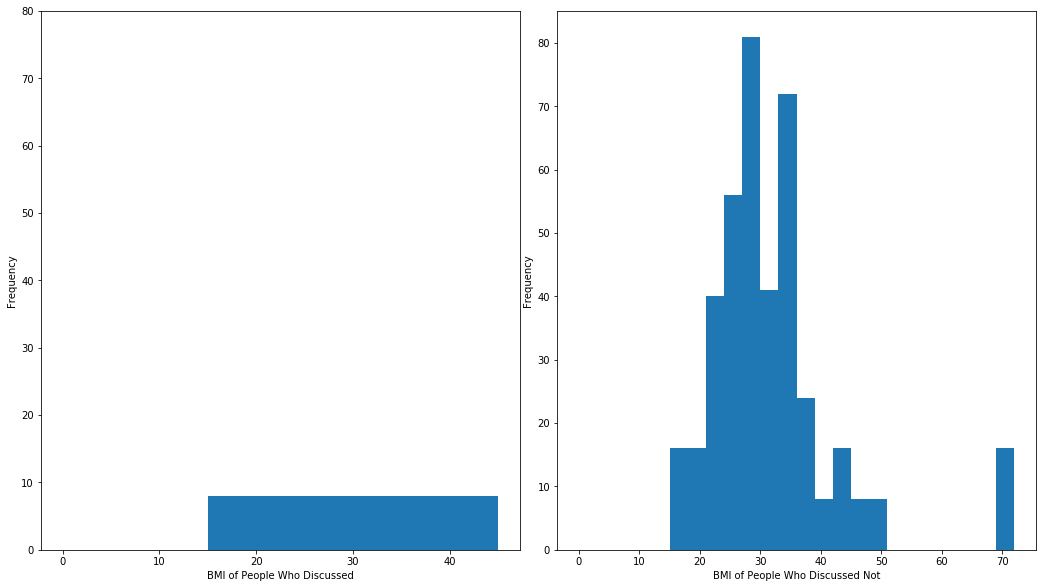

In [100]:
# creat two histograms for the above point
temp1 = df[df['doctor_discussion']==1]
temp2 = df[df['doctor_discussion']==0]

#figure size
plt.figure(figsize=[14.7,8.27]);

#First group
plt.subplot(1,2,1);
plt.tight_layout();
bin_size = np.arange(0, temp1['BMI'].max()+2,15);
plt.hist(data=temp1, x='BMI', bins = bin_size);
plt.xlabel('BMI of People Who Discussed');
plt.ylabel('Frequency');
plt.ylim([0,80]);

#Second group
plt.subplot(1,2,2);
plt.tight_layout();
bin_size = np.arange(0, temp2['BMI'].max()+2,3);
plt.hist(data=temp2, x='BMI', bins = bin_size);
plt.xlabel('BMI of People Who Discussed Not');
plt.ylabel('Frequency');

It becomes clear now that who did not discuss have a lower BMI average. However, a few only had discussed.

### Answer Question 2

> 2- Are people who have obese siblings have less BMI average?

In [101]:
df[df['siblings_obesity']==1]['BMI'].mean(), df[df['siblings_obesity']==0]['BMI'].mean()

(31.29233650543886, 33.051538771232806)

As shown, who has an obese sibling tend to have a lower BMI. Let us visualize the result.

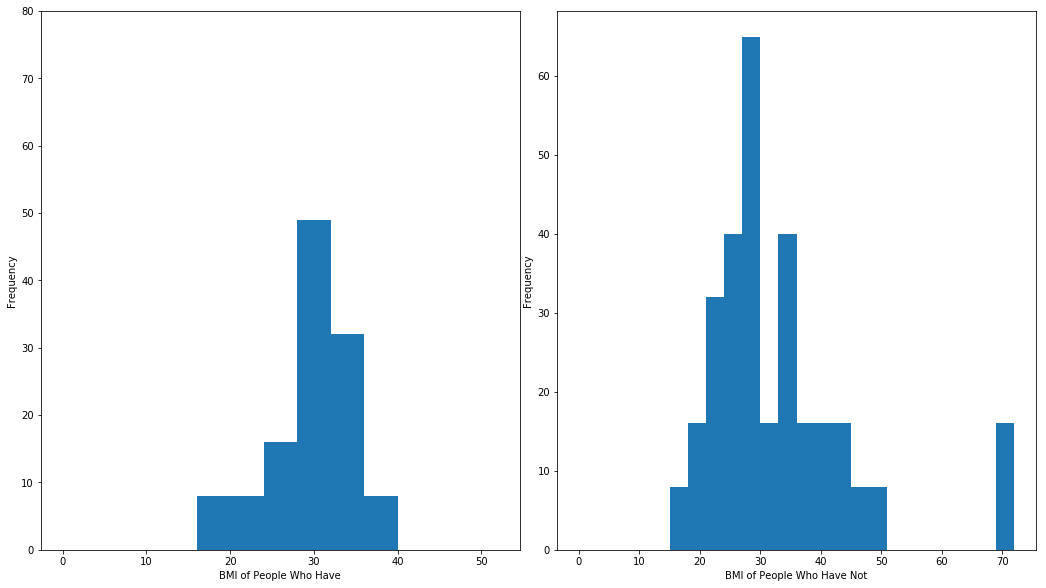

In [104]:
# creat two histograms for the above point
temp1 = df[df['siblings_obesity']==1]
temp2 = df[df['siblings_obesity']==0]

#figure size
plt.figure(figsize=[14.7,8.27]);

#First group
plt.subplot(1,2,1);
plt.tight_layout();
bin_size = np.arange(0, temp1['BMI'].max()+2,4);
plt.hist(data=temp1, x='BMI', bins = bin_size);
plt.xlabel('BMI of People Who Have');
plt.ylabel('Frequency');
plt.ylim([0,80]);

#Second group
plt.subplot(1,2,2);
plt.tight_layout();
bin_size = np.arange(0, temp2['BMI'].max()+2,3);
plt.hist(data=temp2, x='BMI', bins = bin_size);
plt.xlabel('BMI of People Who Have Not');
plt.ylabel('Frequency');

It is clear now that the two distribution tend to be normal, and people who have obese siblings, have a less BMI average.

### Answering Question 3

>  3- What proportion of people have answered the last three questions correctly?

In [11]:
correctly_answered.shape[0]/df.shape[0]

0.11267605633802817

In [10]:
# query the qroup who answered correctly

correctly_answered = df[(df['q12']==3)&(df['q13']==4)&(df['q14']==5)]
correctly_answered.shape

(48, 20)

We have 48 people answered correctly, let us examine the other variables for them.

> How does their BMI differ?

In [109]:
# How does thei BMI mean differ?

( correctly_answered['BMI'].mean() - df['BMI'].mean() ) / df['BMI'].mean()

0.3196214840304756

Their BMI mean is higher than the overall BMI mean by 32%.

Let us plot all the other quantitative variables

<Figure size 1058.4x595.44 with 0 Axes>

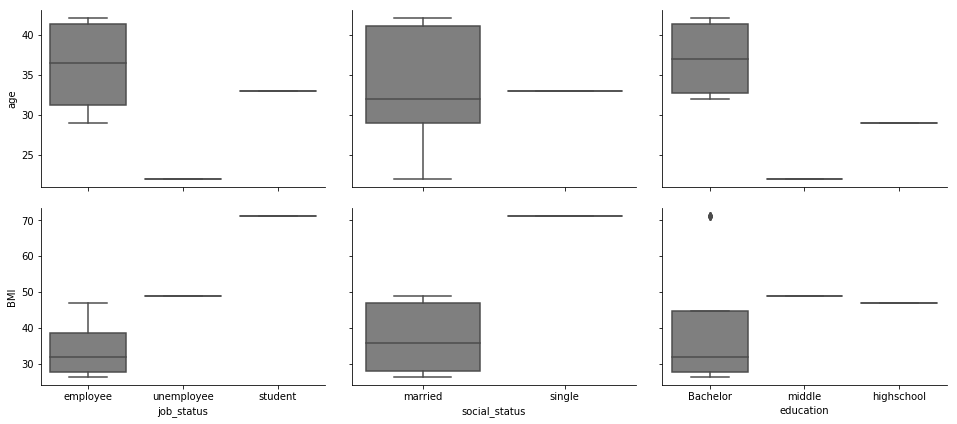

In [111]:
# creat a box plot map for who correctly answered

# numeriv variable = age, BMI
#catagorical variables = job status, social status, education

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[7];
    sb.boxplot(x, y, color = default_color);

plt.figure(figsize = [14.7, 8.27]);
g = sb.PairGrid(data = correctly_answered , y_vars = ['age', 'BMI'], x_vars = ['job_status','social_status','education'],
                size = 3, aspect = 1.5);
g.map(boxgrid);

# Conclusion

> The distribution of the main variables of intreset, BMI, and age are random. That may be because a smal sample size was taken.

> People who discussed their Bmi with their doctors tend to have higher BMI average.

> People who have obese siblings have a higher BMI average (approximately 32% higher).

> people who answered correctly the last three questions tend to be employee, married, and highly educated (bachelor). Furthermore, their minimum age is approximately 27. This indicates that highschool students does not have any idea about BMI.

In [ ]:
! jupyter nbconvert BMI_Analysis_Slides.ipynb --to slides --post serve --template output_toggle